In [3]:
print('a')

a


In [4]:

#importing all the necessary libraries and install mssing dependencies 


from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import sys
import pickle

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score,
    precision_score, f1_score, fbeta_score, classification_report
)
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pickle

In [6]:
#loading the dataset and subsequently viewing the data information 

df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [7]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [10]:
#checking if there are any missing data

df.isnull().any()

HeartDiseaseorAttack    False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
Diabetes                False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [11]:
df['Age'] = df['Age'] * 4
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,36.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,28.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,36.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,44.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,44.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,20.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,44.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,28.0,5.0,1.0


C:\Users\damil\AppData\Local\Temp\ipykernel_6880\2657321494.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=False, color='blue')


<Axes: xlabel='Age'>

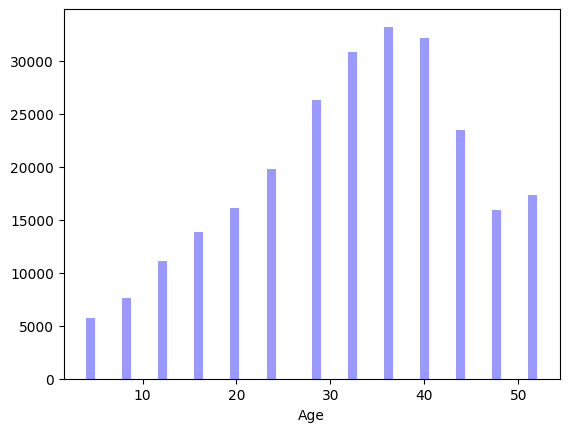

In [12]:
sns.distplot(df['Age'], kde=False, color='blue')

<Axes: xlabel='Sex', ylabel='count'>

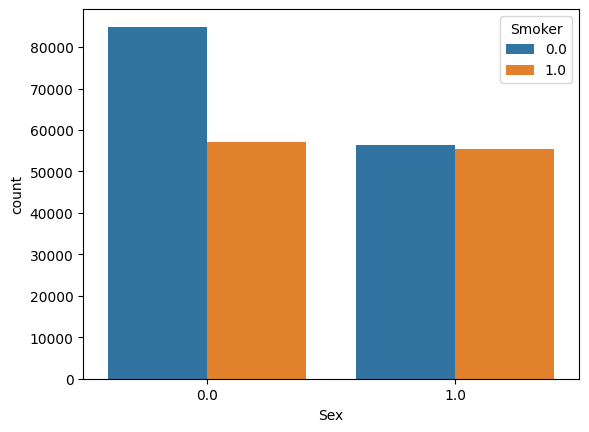

In [13]:
sns.countplot(x='Sex', data=df, hue='Smoker')

<Axes: xlabel='Smoker', ylabel='count'>

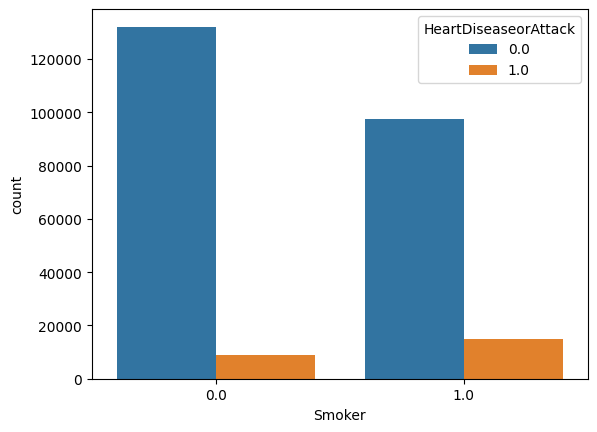

In [14]:
sns.countplot(x='Smoker', data=df, hue='HeartDiseaseorAttack')

<Axes: xlabel='Smoker', ylabel='count'>

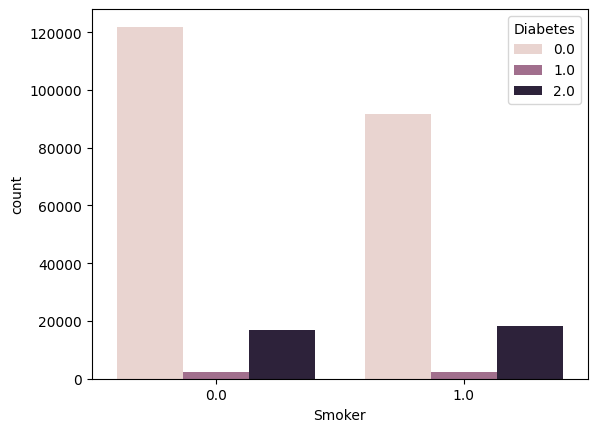

In [15]:
sns.countplot(x='Smoker', data=df, hue='Diabetes')

<Axes: xlabel='Smoker', ylabel='count'>

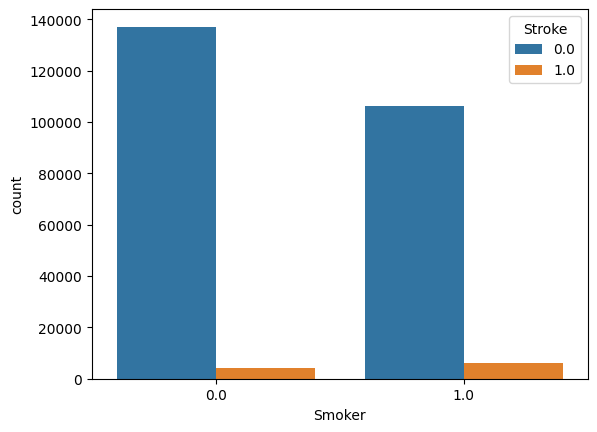

In [16]:
sns.countplot(x='Smoker', data=df, hue='Stroke')

<Axes: xlabel='Diabetes', ylabel='count'>

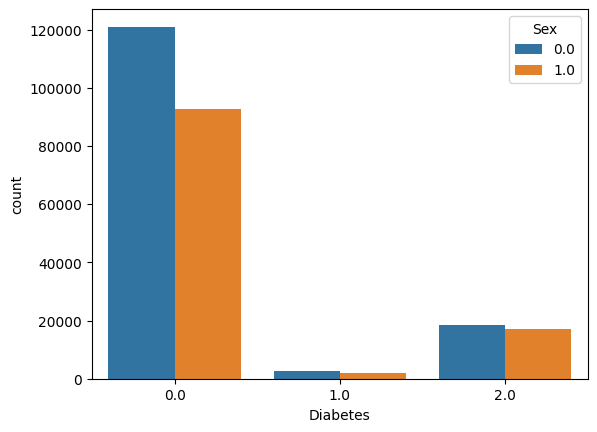

In [17]:
sns.countplot(x='Diabetes', data=df, hue='Sex')

<Axes: xlabel='PhysActivity', ylabel='count'>

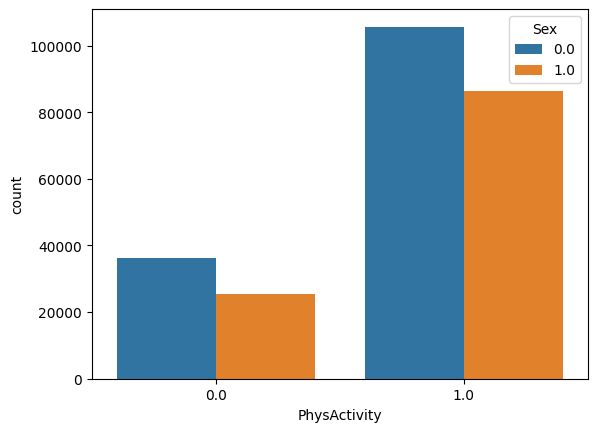

In [18]:
sns.countplot(x='PhysActivity', data=df, hue='Sex')

<Axes: xlabel='PhysActivity', ylabel='count'>

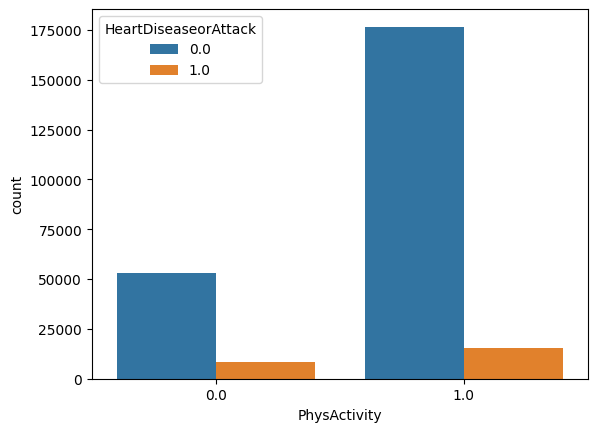

In [19]:
sns.countplot(x='PhysActivity', data=df, hue='HeartDiseaseorAttack')

<Axes: xlabel='PhysActivity', ylabel='count'>

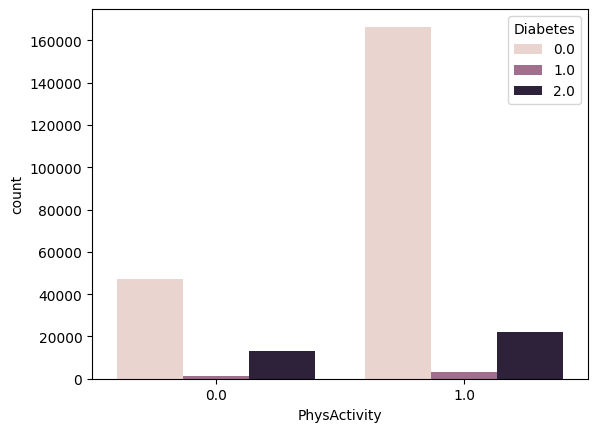

In [20]:
sns.countplot(x='PhysActivity', data=df, hue='Diabetes')

C:\Users\damil\AppData\Local\Temp\ipykernel_6880\1956823343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Education'], kde=False, color='Blue')


<Axes: xlabel='Education'>

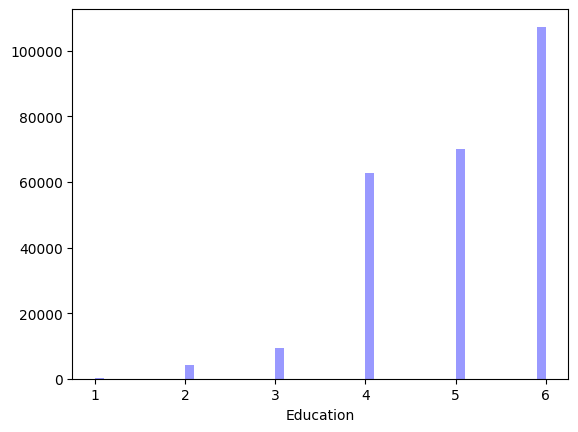

In [21]:
sns.distplot(df['Education'], kde=False, color='Blue')

C:\Users\damil\AppData\Local\Temp\ipykernel_6880\4195732269.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], kde=False, color='Green')


<Axes: xlabel='Income'>

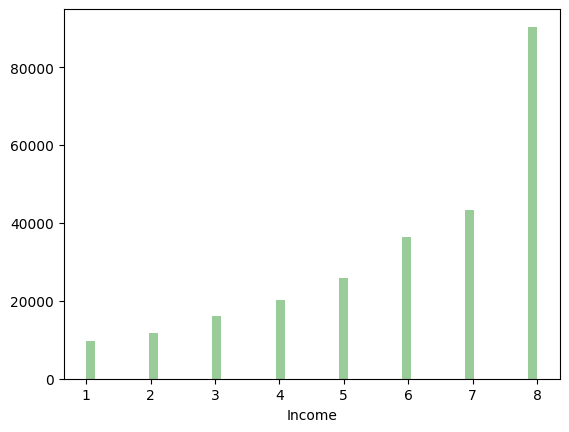

In [22]:
sns.distplot(df['Income'], kde=False, color='Green')

<Axes: xlabel='Fruits', ylabel='count'>

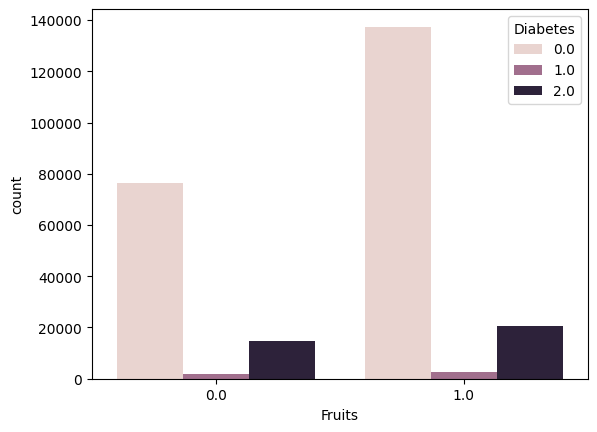

In [23]:
sns.countplot(x='Fruits', data=df, hue='Diabetes')

<Axes: xlabel='Fruits', ylabel='count'>

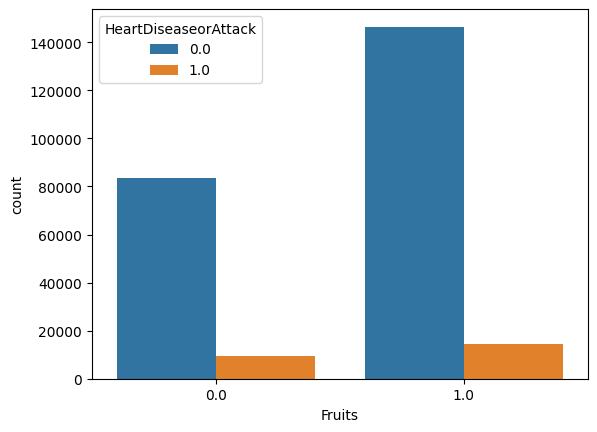

In [24]:
sns.countplot(x='Fruits', data=df, hue='HeartDiseaseorAttack')

<Axes: xlabel='Veggies', ylabel='count'>

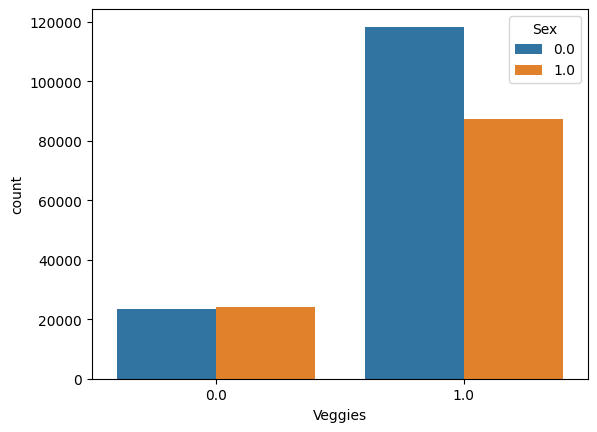

In [25]:
sns.countplot(x='Veggies', data=df, hue='Sex')

<Axes: xlabel='Veggies', ylabel='count'>

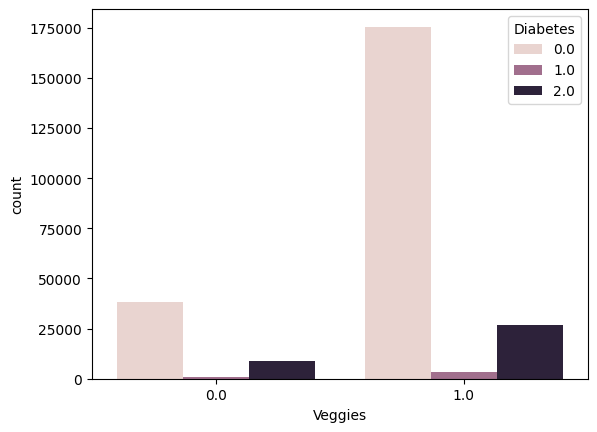

In [26]:
sns.countplot(x='Veggies', data=df, hue='Diabetes')

C:\Users\damil\AppData\Local\Temp\ipykernel_6880\2946275404.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'], kde=False, color ='Yellow')


<Axes: xlabel='BMI'>

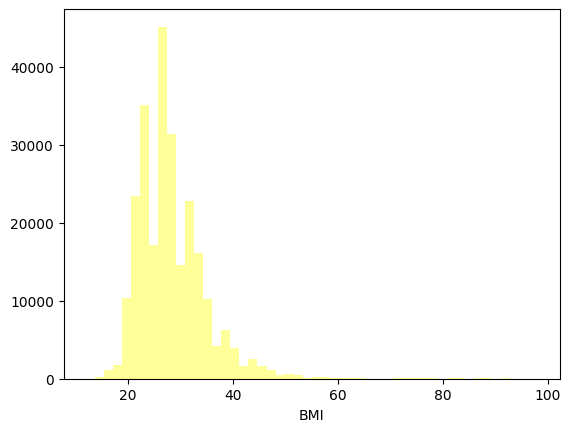

In [27]:
sns.distplot(df['BMI'], kde=False, color ='Yellow')

C:\Users\damil\AppData\Local\Temp\ipykernel_6880\3760827030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'], kde=False,color='Yellow')


<Axes: xlabel='BMI'>

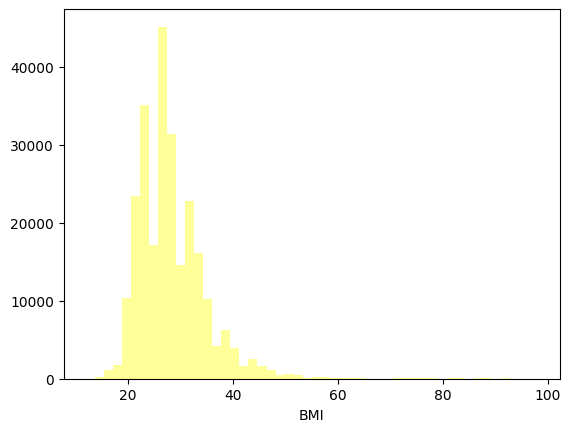

In [28]:
sns.distplot(df['BMI'], kde=False,color='Yellow')

<Axes: xlabel='BMI', ylabel='count'>

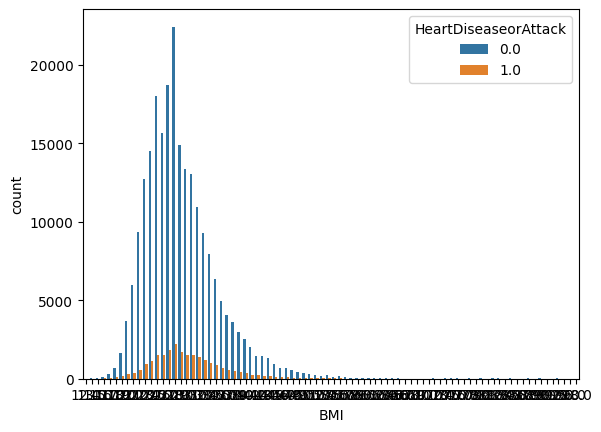

In [29]:
sns.countplot(x='BMI', data=df, hue='HeartDiseaseorAttack')

<Axes: xlabel='BMI', ylabel='count'>

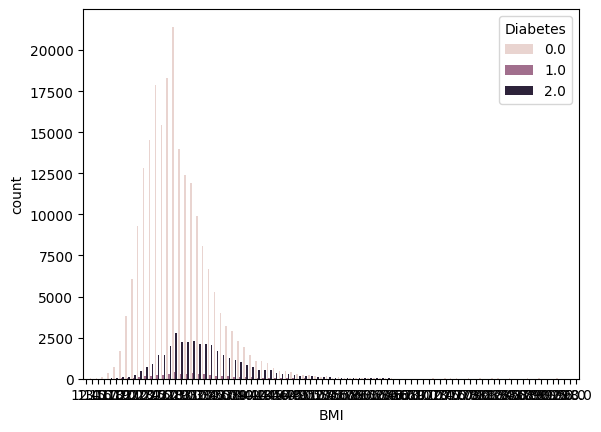

In [30]:
sns.countplot(x='BMI', data=df, hue='Diabetes')

<Axes: xlabel='AnyHealthcare', ylabel='count'>

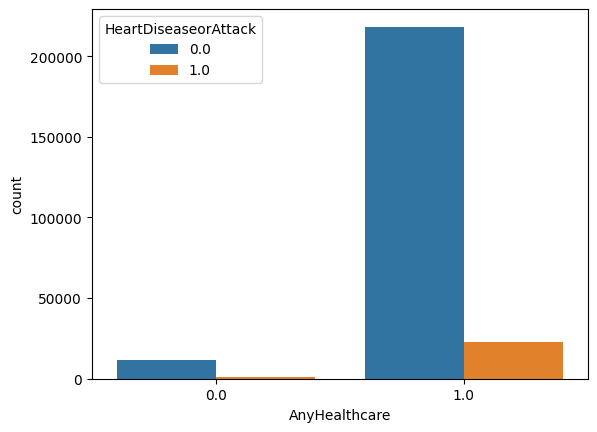

In [31]:
#we see here how healthcare is so important and how it affect on person and make 
#him good more than people who don't have
sns.countplot(x='AnyHealthcare', data=df, hue='HeartDiseaseorAttack')

<Axes: xlabel='AnyHealthcare', ylabel='count'>

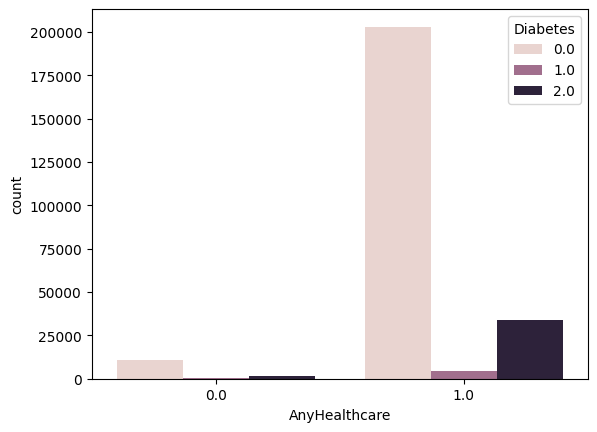

In [32]:
sns.countplot(x='AnyHealthcare', data=df, hue='Diabetes')

<Axes: xlabel='AnyHealthcare', ylabel='count'>

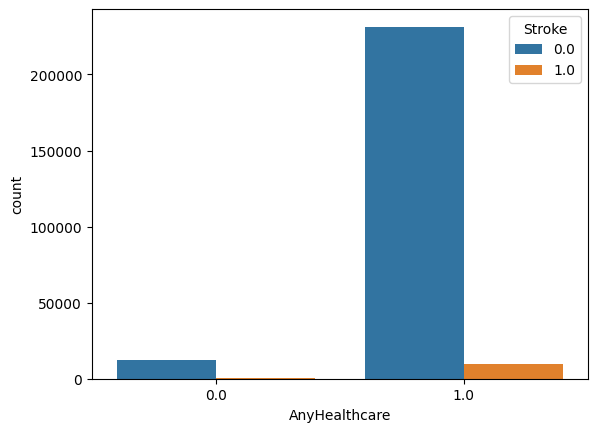

In [33]:
sns.countplot(x='AnyHealthcare', data=df, hue='Stroke')

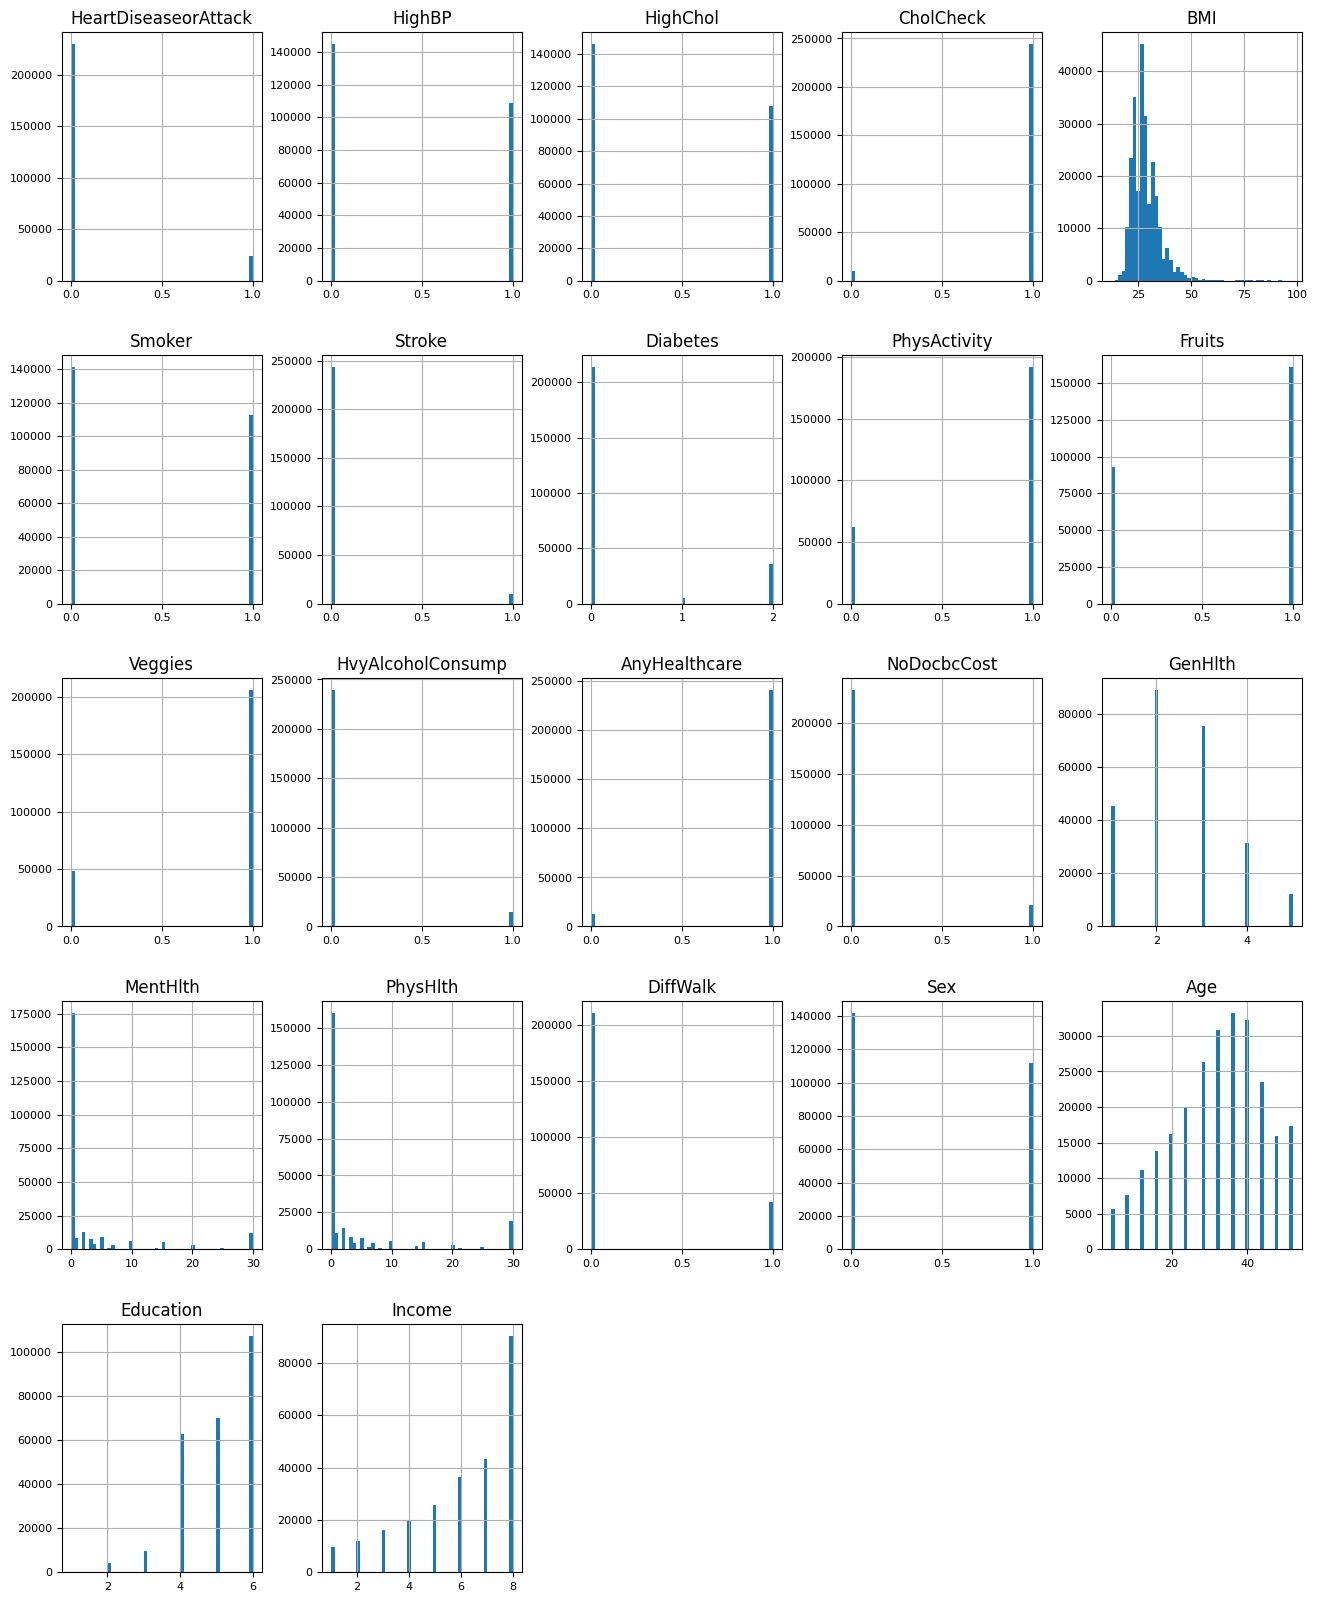

In [34]:
#visualization on how each feature affect the target variable

df.hist (figsize=(16, 20), xlabelsize=8, ylabelsize=8, bins=50);

In [35]:
# correlation matrix of how each feature affect each other 

corr_matrix  = df.corr()
print(corr_matrix)

                      HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765   0.044206   
HighBP                            0.209361  1.000000  0.298199   0.098508   
HighChol                          0.180765  0.298199  1.000000   0.085642   
CholCheck                         0.044206  0.098508  0.085642   1.000000   
BMI                               0.052904  0.213748  0.106722   0.034495   
Smoker                            0.114441  0.096991  0.091299  -0.009929   
Stroke                            0.203002  0.129575  0.092620   0.024158   
Diabetes                          0.180272  0.271596  0.209085   0.067546   
PhysActivity                     -0.087299 -0.125267 -0.078046   0.004190   
Fruits                           -0.019790 -0.040555 -0.040859   0.023849   
Veggies                          -0.039167 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump                -0.028991 -0.003972 -0.011543  -0.023730   

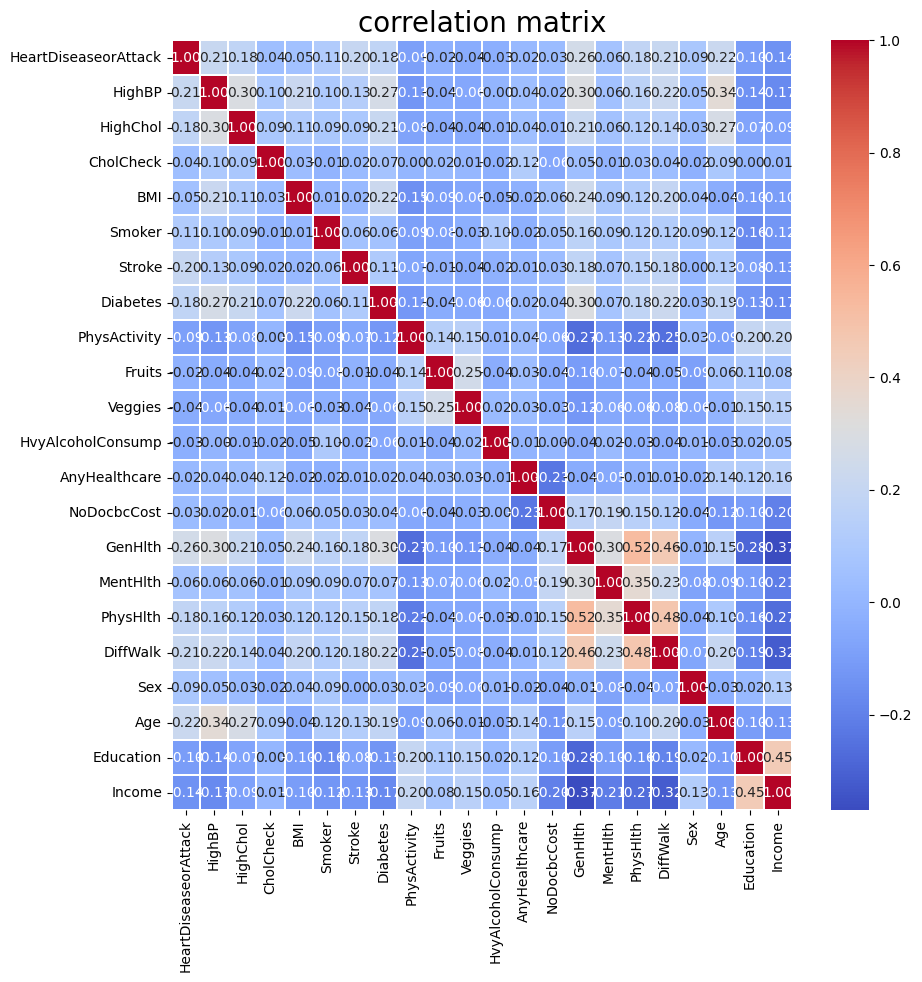

In [36]:
import matplotlib.pyplot as plt #correlation matrix visualization

plt.figure(figsize= (10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title('correlation matrix', fontsize= 20)
plt.show()

In [37]:
#since the dataset is highly skewed, i have to populate the dataset based on what i have before and 
#then use the sampling method to get the required number of samples
#this is a workaround to avoid the issue of sampling from a skewed dataset
#another method could be used but this bootsrapping works better 



data_file = 'heart_disease_health_indicators_BRFSS2015.csv'
df = pd.read_csv(data_file)


minority_class = df[df['HeartDiseaseorAttack'] == 1]
majority_class = df[df['HeartDiseaseorAttack'] == 0]

num_samples_needed = len(majority_class) - len(minority_class)


def bootstrap_sample(data, n_samples):
    return data.sample(n=n_samples, replace=True)

bootstrap_samples = bootstrap_sample(minority_class, num_samples_needed)
balanced_df = pd.concat([majority_class, minority_class, bootstrap_samples])
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)


print(balanced_df['HeartDiseaseorAttack'].value_counts())


X = balanced_df.drop('HeartDiseaseorAttack', axis=1)
y = balanced_df['HeartDiseaseorAttack']


print(f"Number of samples in X: {X.shape[0]}")
print(f"Number of samples in y: {y.shape[0]}")

HeartDiseaseorAttack
0.0    229787
1.0    229787
Name: count, dtype: int64
Number of samples in X: 459574
Number of samples in y: 459574


In [38]:
#droping the unneccessary columns and those that have the lowest correlation with the target variable 

X = balanced_df.drop(['Education', 'Income', 'CholCheck', 'NoDocbcCost', 'HeartDiseaseorAttack'], axis=1)
y = balanced_df['HeartDiseaseorAttack']

In [39]:
all_columns = balanced_df.columns.tolist()
print(all_columns)

['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [40]:
#feature engineering... since the age is too low, its better to modify it. 

X['Age'] = balanced_df['Age']*4
X

,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,0.0,31.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,0.0,0.0,1.0,1.0,32.0
1,1.0,1.0,30.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,48.0
2,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,40.0
3,0.0,0.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,20.0
4,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459569,1.0,1.0,30.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,3.0,2.0,3.0,0.0,0.0,44.0
459570,0.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,5.0,0.0,0.0,36.0
459571,1.0,1.0,23.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,14.0,30.0,1.0,0.0,52.0
459572,1.0,0.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,7.0,0.0,1.0,40.0


In [41]:
y

0         0.0
1         1.0
2         0.0
3         0.0
4         1.0
         ... 
459569    0.0
459570    0.0
459571    1.0
459572    0.0
459573    1.0
Name: HeartDiseaseorAttack, Length: 459574, dtype: float64

In [42]:
#fitting the X and y to be able to train the model. after all the data has been test and rain through, 
#picking one that works best which is 70, 30 train test respectively.

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
Y_train.value_counts()

HeartDiseaseorAttack
1.0    160852
0.0    160849
Name: count, dtype: int64

In [43]:
X_train

,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
195032,1.0,0.0,31.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,20.0,0.0,1.0,44.0
369766,0.0,0.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,24.0
438928,1.0,0.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,52.0
22093,1.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,52.0
146084,1.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1.0,1.0,24.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,52.0
365838,0.0,0.0,22.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,4.0,15.0,15.0,0.0,0.0,40.0
131932,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,44.0
146867,1.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,36.0


In [44]:
balanced_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,31.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,1.0,1.0,8.0,4.0,4.0
1,1.0,1.0,1.0,1.0,30.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,5.0,5.0
3,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,3.0
4,1.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459569,0.0,1.0,1.0,1.0,30.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,3.0,2.0,3.0,0.0,0.0,11.0,6.0,5.0
459570,0.0,0.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,5.0,0.0,0.0,9.0,6.0,3.0
459571,1.0,1.0,1.0,1.0,23.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,5.0,14.0,30.0,1.0,0.0,13.0,5.0,1.0
459572,0.0,1.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,7.0,0.0,1.0,10.0,6.0,5.0


In [52]:
max_values = balanced_df.max()

min_values = balanced_df.min()

print("Maximum values:\n", max_values)
print("Minimum values:\n", min_values)

Maximum values:
 HeartDiseaseorAttack     1.0
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
Stroke                   1.0
Diabetes                 2.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        1.0
AnyHealthcare            1.0
NoDocbcCost              1.0
GenHlth                  5.0
MentHlth                30.0
PhysHlth                30.0
DiffWalk                 1.0
Sex                      1.0
Age                     13.0
Education                6.0
Income                   8.0
dtype: float64
Minimum values:
 HeartDiseaseorAttack     0.0
HighBP                   0.0
HighChol                 0.0
CholCheck                0.0
BMI                     12.0
Smoker                   0.0
Stroke                   0.0
Diabetes                 0.0
PhysActivity             0.0
Fruits                   0.0
Veggies                

In [45]:
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)
x_train

array([[ 0.86188362, -1.10168581,  0.3194361 , ..., -0.62099346,
         1.00125973,  0.69868784],
       [-1.16024946, -1.10168581, -0.13014855, ..., -0.62099346,
         1.00125973, -1.02363186],
       [ 0.86188362, -1.10168581, -0.72959475, ..., -0.62099346,
         1.00125973,  1.38761573],
       ...,
       [-1.16024946, -1.10168581, -1.32904095, ..., -0.62099346,
        -0.99874186,  0.69868784],
       [ 0.86188362, -1.10168581, -1.32904095, ..., -0.62099346,
        -0.99874186,  0.00975996],
       [ 0.86188362,  0.90769981, -0.42987165, ..., -0.62099346,
         1.00125973,  0.69868784]])

In [46]:
# this helps Define parameter grids. the grid search CV helps to find the best parameter for the every model that is being used. 
#simply called hyper parameter tuning 
from altair import Y


param_grids = {
    'LR': {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['lbfgs'],
        'max_iter': [100, 1000],
        'class_weight': ['balanced']
    },
    'KNN': {
        'n_neighbors': [5, 50, 100, 154]
    },
    'DT': {
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 5, 10]
    },
    'RT': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 5]
    },
    'NB': {},
    'XGB': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'scale_pos_weight': [len(Y_train[Y_train == 0]) / len(Y_train[Y_train == 1])]
    }
}

# Perform Grid Search CV for each model
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grids[model_name],
                               scoring = 'precision',
                               cv=5,
                               n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1 Score for {model_name}: {grid_search.best_score_}")


IndentationError: unexpected indent (1409651967.py, line 3)

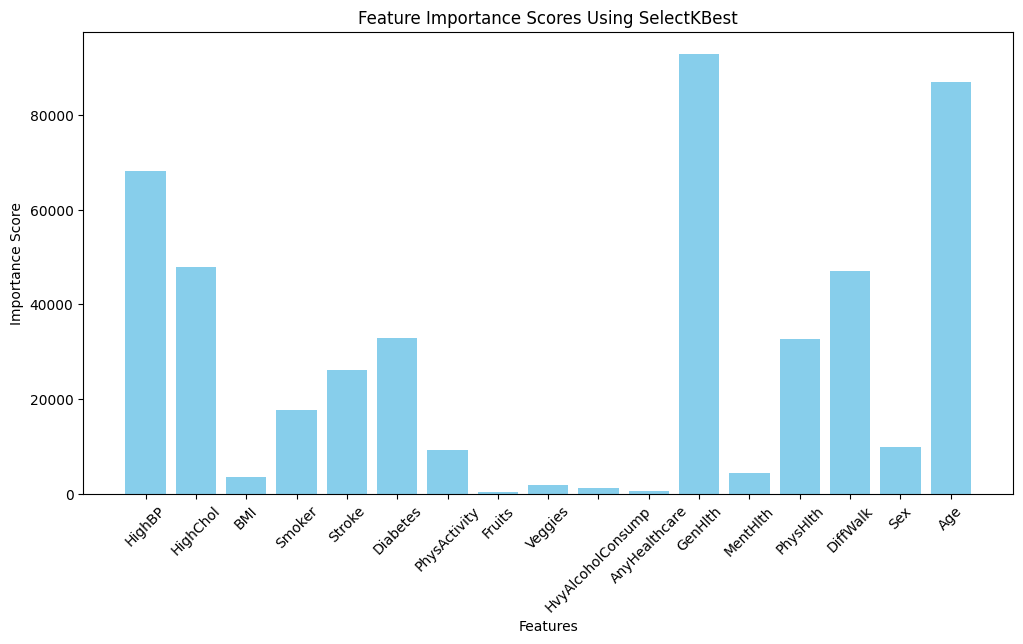

In [ ]:
#using Select best to visualize how features affect the target variables 



from sklearn.feature_selection import SelectKBest, f_classif



selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get scores and selected features
scores = selector.scores_
selected_features = selector.get_support()

# Visualize the scores
features = X.columns
scores_df = pd.DataFrame({'Feature': features, 'Score': scores})

# Plot
plt.figure(figsize=(12, 6))
plt.bar(scores_df['Feature'], scores_df['Score'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores Using SelectKBest')
plt.xticks(rotation=45)
plt.show()

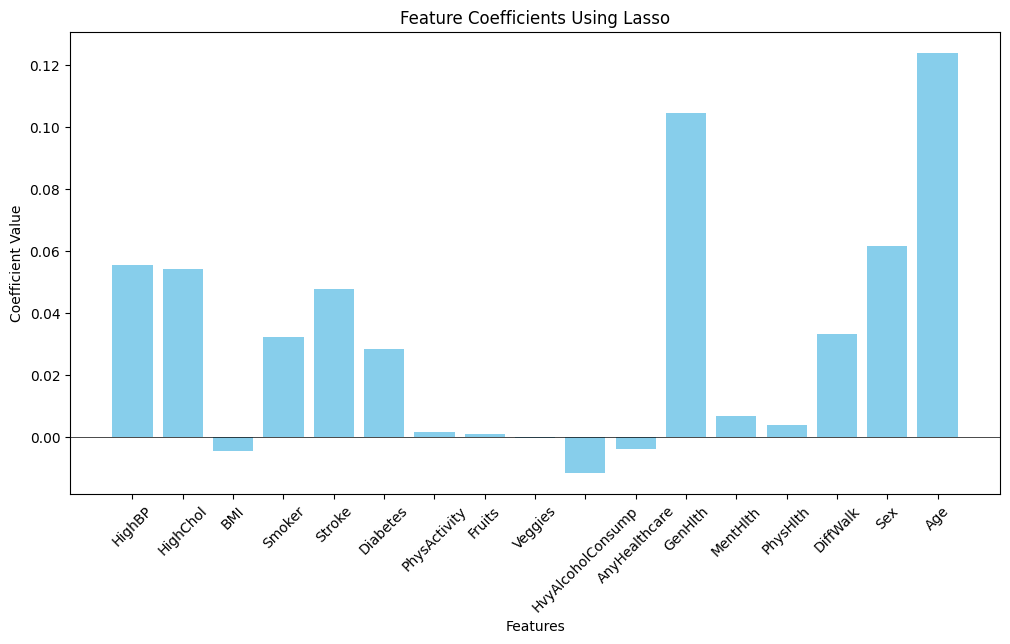

In [ ]:
# Standardize the features
from sklearn.linear_model import LassoCV


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LassoCV for feature selection
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Get coefficients
coefficients = lasso.coef_

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Visualize the coefficients
plt.figure(figsize=(12, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients Using Lasso')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_features = pca.fit_transform(df)

print(pca_features)

[[19.07484643  7.90678315]
 [-5.41255925 -2.32563483]
 [35.46551536 -7.33833552]
 ...
 [-5.16500501  0.65405248]
 [-5.73135626 -4.25513643]
 [-5.48344641 -2.33008904]]


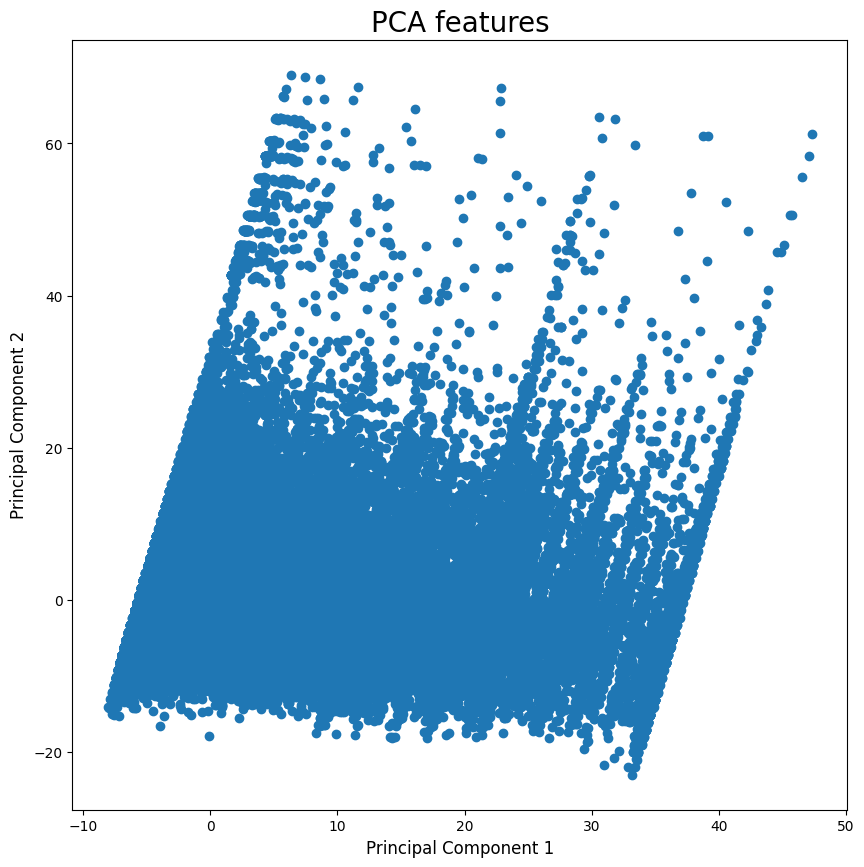

In [ ]:
import matplotlib.pyplot as plt

# Perform PCA on the dataset
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df)

# Plot the PCA features
plt.figure(figsize=(10, 10))
plt.scatter(pca_features[:, 0], pca_features[:, 1])
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('PCA features', fontsize=20)
plt.show()

In [ ]:
# Perform PCA on the dataset
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df)

# Get the coefficients of the PCA features
coefficients = pca.components_

# Create a DataFrame of the coefficients
coef_df = pd.DataFrame({'Feature': df.columns, 'Coefficient': coefficients[0]})

# Print the coefficients DataFrame
print(coef_df)

                 Feature  Coefficient
0   HeartDiseaseorAttack     0.005270
1                 HighBP     0.009007
2               HighChol     0.006837
3              CholCheck     0.000492
4                    BMI     0.166970
5                 Smoker     0.006725
6                 Stroke     0.002998
7               Diabetes     0.014090
8           PhysActivity    -0.010611
9                 Fruits    -0.003664
10               Veggies    -0.003366
11     HvyAlcoholConsump    -0.000397
12         AnyHealthcare    -0.000715
13           NoDocbcCost     0.005768
14               GenHlth     0.061713
15              MentHlth     0.526987
16              PhysHlth     0.827376
17              DiffWalk     0.018851
18                   Sex    -0.003205
19                   Age     0.012848
20             Education    -0.018477
21                Income    -0.067784


In [49]:
best_params = {
    'LR': {'C': 10.0, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'},
    'KNN': {'n_neighbors': 154},
    'DT': {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2},
    'RT': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200},
    'NB': {},  # No parameters for GaussianNB
    'XGB': {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': 9.572517266015717}
}

# Define models
models = {
    'LR': LogisticRegression(**best_params['LR']),
    'KNN': KNeighborsClassifier(**best_params['KNN']),
    'DT': DecisionTreeClassifier(**best_params['DT']),
    'RT': RandomForestClassifier(**best_params['RT']),
    'XGB': xgb.XGBClassifier(**best_params['XGB'])
}

# Perform 5-fold cross-validation on the models
scores = {name: cross_val_score(model, X_train, Y_train, cv=5) for name, model in models.items()}

# Print the mean and standard deviation of the scores
for name, score in scores.items():
    #print(f'Model: {name}')
    #print(f'Mean: {score.mean()}')
    #print(f'Standard Deviation: {score.std()}')
    #print()

In [50]:
#this is where the individual model are trained and output to another folder because the output is quite large.

with open('output_base_models.txt', 'w') as f:
    for name, model in models.items():
        print(f'Using {name}:', file=f)
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        print(f'Training Accuracy: {accuracy_score(Y_train, model.predict(X_train))}', file=f)
        print(f'Testing Accuracy: {accuracy_score(Y_test, y_pred)}', file=f)
        print(f'Confusion Matrix:\n{confusion_matrix(Y_test, y_pred)}', file=f)
        print(f'Recall: {recall_score(Y_test, y_pred)}', file=f)
        print(f'Precision: {precision_score(Y_test, y_pred)}', file=f)
        print(f'F1-score: {f1_score(Y_test, y_pred)}', file=f)
        print(f'Fbeta-score: {fbeta_score(Y_test, y_pred, beta=1)}', file=f)
        print(classification_report(Y_test, y_pred), file=f)
        print('-' * 33, file=f)

c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
import joblib

# Load the pre-trained Random Forest model
rf_model = joblib.load('RT_model.joblib')

# Print the feature names used in the Random Forest model
print(rf_model.feature_names_in_)


['HighBP' 'HighChol' 'BMI' 'Smoker' 'Stroke' 'Diabetes' 'PhysActivity'
 'Fruits' 'Veggies' 'HvyAlcoholConsump' 'AnyHealthcare' 'GenHlth'
 'MentHlth' 'PhysHlth' 'DiffWalk' 'Sex' 'Age']


In [ ]:
#training the hybrid model inform of meta-data and output to a .txt file


import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, fbeta_score, classification_report

# Assuming X_train and Y_train are pandas DataFrames or Series
n_folds = 5

# Initialize meta-features
meta_features_train = np.zeros((X_train.shape[0], len(models)))
meta_features_test = np.zeros((X_test.shape[0], len(models)))

# K-Fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for i, (name, model) in enumerate(models.items()):
    fold_preds = np.zeros((X_test.shape[0], n_folds))
    
    for j, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        # Split data
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = Y_train.iloc[train_idx], Y_train.iloc[val_idx]
        
        # Train model
        model.fit(X_fold_train, y_fold_train)
        
        # Generate predictions
        meta_features_train[val_idx, i] = model.predict(X_fold_val)
        fold_preds[:, j] = model.predict(X_test)
    
    # Take the mean of the fold predictions for the test set
    meta_features_test[:, i] = fold_preds.mean(axis=1)

# Train the meta-model
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)
meta_model.fit(meta_features_train, Y_train)

# Predict using the meta-model
meta_test_predictions = meta_model.predict(meta_features_test)

# Evaluate the meta-model
with open('output_hybrid.txt', 'w') as f:
    print('Using Hybrid Model:', file=f)
    print(f'Training Accuracy: {accuracy_score(Y_train, meta_model.predict(meta_features_train))}', file=f)
    print(f'Testing Accuracy: {accuracy_score(Y_test, meta_test_predictions)}', file=f)
    print(f'Confusion Matrix:\n{confusion_matrix(Y_test, meta_test_predictions)}', file=f)
    print(f'Recall: {recall_score(Y_test, meta_test_predictions)}', file=f)
    print(f'Precision: {precision_score(Y_test, meta_test_predictions)}', file=f)
    print(f'F1-score: {f1_score(Y_test, meta_test_predictions)}', file=f)
    print(f'Fbeta-score: {fbeta_score(Y_test, meta_test_predictions, beta=1)}', file=f)
    print(classification_report(Y_test, meta_test_predictions), file=f)
    print('-' * 33, file=f)


c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [ ]:
import pickle

# Save the hybrid model components
with open('hybrid_model.pkl', 'wb') as f:
    pickle.dump({
        'base_models': models,
        'meta_model': meta_model,
        'scaler': scaler  # Assuming scaler was used for scaling the data
    }, f)


In [ ]:
import pickle
import numpy as np

# Load the saved hybrid model
with open('hybrid_model.pkl', 'rb') as f:
    hybrid_model = pickle.load(f)

# Extract the components of the hybrid model
base_models = hybrid_model['base_models']
meta_model = hybrid_model['meta_model']
scaler = hybrid_model['scaler']


In [53]:
#testing the models 

import numpy as np
import pandas as pd
import pickle
from joblib import load

# Load the saved hybrid model
with open('hybrid_model.pkl', 'rb') as f:
    hybrid_model = pickle.load(f)

# Extract the components of the hybrid model
base_models = hybrid_model['base_models']
meta_model = hybrid_model['meta_model']
scaler = hybrid_model['scaler']

# Feature names used in training
feature_names = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 
                 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 
                 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']

# New data point for prediction
new_data = np.array([[1, 1, 40, 1, 1, 0, 0, 0, 1, 1, 1, 0, 20, 25, 1, 0, 70]])

# Convert new data to DataFrame with feature names
new_data_df = pd.DataFrame(new_data, columns=feature_names)

# Scale the new data point
new_data_scaled = scaler.transform(new_data_df)

# Generate meta-features using base models
meta_features_new = np.zeros((1, len(base_models)))

for i, (name, model) in enumerate(base_models.items()):
    # Convert scaled data back to DataFrame to keep feature names for the model
    new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=feature_names)
    meta_features_new[0, i] = model.predict_proba(new_data_scaled_df)[0, 1]  # Use predict_proba for probability

# Predict probability using the meta-model
probability = meta_model.predict_proba(meta_features_new)[0, 1]

# Output the probability result as a percentage
print(f"Probability of heart disease: {probability * 100:.2f}%")

# Debugging information
print(f"New data (scaled): {new_data_scaled}")
print(f"Meta-features: {meta_features_new}")


Probability of heart disease: 9.12%
New data (scaled): [[ 0.86355541  0.9074549   1.66080687  0.95711705  3.06144291 -0.56417305
  -1.54402427 -1.28033256  0.51552107  4.51722809  0.21261042 -2.50150161
   1.95500297  1.76203844  1.61026061 -0.99989743  2.932795  ]]
Meta-features: [[0.05096413 0.05194805 0.91648352 0.415      0.24303883]]


In [ ]:
# Generate predictions from each base model
for name, model in base_models.items():
    proba = model.predict_proba(new_data_scaled_df)
    print(f"{name} Model Prediction Probabilities: {proba}")


LR Model Prediction Probabilities: [[9.99981771e-01 1.82293138e-05]]
KNN Model Prediction Probabilities: [[0.94805195 0.05194805]]
DT Model Prediction Probabilities: [[0.96085271 0.03914729]]
RT Model Prediction Probabilities: [[1. 0.]]
XGB Model Prediction Probabilities: [[9.9986213e-01 1.3785889e-04]]


In [ ]:
import joblib

# Your hybrid model dictionary
hybrid_model = {
    'base_models': models,
    'meta_model': meta_model,
    'scaler': scaler
}

# Save the hybrid model
joblib.dump(hybrid_model, 'hybrid_model.joblib')


['hybrid_model.joblib']

In [ ]:
new_data = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 18]])

In [ ]:
new_data_point = np.array([[1, 1, 30, 0, 0, 0, 1, 1, 1, 0, 1, 3, 2, 1, 0, 1, 45]])

# Scale the new data point
new_data_point_scaled = scaler.transform(new_data_point)

# Use the hybrid model to predict
meta_features_new = np.zeros((1, len(models)))

for i, (name, model) in enumerate(models.items()):
    meta_features_new[0, i] = model.predict(new_data_point_scaled)

# Predict using the meta-model
new_data_prediction = meta_model.predict(meta_features_new)

# Output the prediction result
print(f"The model predicts the new data point has heart disease: {bool(new_data_prediction[0])}")

# Function to calculate percentage match and feature matches
def calculate_percentage_and_feature_match(new_data_point, training_data, threshold=0.1):
    matches = []
    for i, train_point in enumerate(training_data):
        feature_matches = {}
        for j, (feature_value, train_value) in enumerate(zip(new_data_point[0], train_point)):
            if abs(feature_value - train_value) < threshold:
                feature_matches[X.columns[j]] = f'Match ({feature_value:.2f} ≈ {train_value:.2f})'
            else:
                feature_matches[X.columns[j]] = f'No match ({feature_value:.2f} ≠ {train_value:.2f})'
        matches.append(feature_matches)
    return matches

# Calculate percentage match and feature-wise matches for a sample of training data
matches = calculate_percentage_and_feature_match(new_data_point_scaled, X_train.values[:10])
for i, match in enumerate(matches):
    print(f"Training Data Point {i+1} Feature Matches:")
    for feature, result in match.items():
        print(f"  {feature}: {result}")
    print()

The model predicts the new data point has heart disease: False
Training Data Point 1 Feature Matches:
  HighBP: No match (0.86 ≠ 0.00)
  HighChol: No match (0.91 ≠ 0.00)
  BMI: No match (0.17 ≠ 32.00)
  Smoker: No match (-1.04 ≠ 1.00)
  Stroke: No match (-0.33 ≠ 0.00)
  Diabetes: No match (-0.56 ≠ 0.00)
  PhysActivity: No match (0.65 ≠ 1.00)
  Fruits: No match (0.78 ≠ 1.00)
  Veggies: No match (0.52 ≠ 1.00)
  HvyAlcoholConsump: No match (-0.22 ≠ 0.00)
  AnyHealthcare: No match (0.21 ≠ 1.00)
  GenHlth: No match (0.09 ≠ 3.00)
  MentHlth: No match (-0.22 ≠ 0.00)
  PhysHlth: No match (-0.52 ≠ 0.00)
  DiffWalk: No match (-0.62 ≠ 0.00)
  Sex: Match (1.00 ≈ 1.00)
  Age: No match (0.78 ≠ 40.00)

Training Data Point 2 Feature Matches:
  HighBP: No match (0.86 ≠ 0.00)
  HighChol: Match (0.91 ≈ 1.00)
  BMI: No match (0.17 ≠ 21.00)
  Smoker: No match (-1.04 ≠ 1.00)
  Stroke: No match (-0.33 ≠ 0.00)
  Diabetes: No match (-0.56 ≠ 0.00)
  PhysActivity: No match (0.65 ≠ 1.00)
  Fruits: No match (0.78 

c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\damil\AppData\Local\Temp\ipykernel_8592\694651066.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  meta_features_new[0, i] = model.predict(new_data_point_scaled)
c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\damil\AppData\Local\Temp\ipykernel_8592\694651066.py:

In [ ]:
new_data_point = np.array([[1, 1, 30, 0, 0, 0, 1, 1, 1, 0, 1, 3, 2, 1, 0, 1, 45]])

# Scale the new data point
new_data_point_scaled = scaler.transform(new_data_point)

# Use the hybrid model to predict
meta_features_new = np.zeros((1, len(models)))

for i, (name, model) in enumerate(models.items()):
    meta_features_new[0, i] = model.predict(new_data_point_scaled)

# Predict using the meta-model
new_data_prediction = meta_model.predict(meta_features_new)

# Output the prediction result
print(f"The model predicts the new data point has heart disease: {bool(new_data_prediction[0])}")

# Function to calculate percentage match and feature matches
def calculate_percentage_and_feature_match(new_data_point, training_data, threshold=0.1):
    matches = []
    match_percentages = []
    for train_point in training_data:
        feature_matches = {}
        match_count = 0
        for j, (feature_value, train_value) in enumerate(zip(new_data_point[0], train_point)):
            if abs(feature_value - train_value) < threshold:
                feature_matches[X.columns[j]] = f'Match ({feature_value:.2f} ≈ {train_value:.2f})'
                match_count += 1
            else:
                feature_matches[X.columns[j]] = f'No match ({feature_value:.2f} ≠ {train_value:.2f})'
        matches.append(feature_matches)
        match_percentage = (match_count / len(new_data_point[0])) * 100
        match_percentages.append(match_percentage)
    return matches, match_percentages

# Calculate percentage match and feature-wise matches for a sample of training data
matches, match_percentages = calculate_percentage_and_feature_match(new_data_point_scaled, X_train.values[:10])
for i, (match, match_percentage) in enumerate(zip(matches, match_percentages)):
    print(f"Training Data Point {i+1} Feature Matches ({match_percentage:.2f}%):")
    for feature, result in match.items():
        print(f"  {feature}: {result}")
    print()

The model predicts the new data point has heart disease: False
Training Data Point 1 Feature Matches (5.88%):
  HighBP: No match (0.86 ≠ 0.00)
  HighChol: No match (0.91 ≠ 0.00)
  BMI: No match (0.17 ≠ 32.00)
  Smoker: No match (-1.04 ≠ 1.00)
  Stroke: No match (-0.33 ≠ 0.00)
  Diabetes: No match (-0.56 ≠ 0.00)
  PhysActivity: No match (0.65 ≠ 1.00)
  Fruits: No match (0.78 ≠ 1.00)
  Veggies: No match (0.52 ≠ 1.00)
  HvyAlcoholConsump: No match (-0.22 ≠ 0.00)
  AnyHealthcare: No match (0.21 ≠ 1.00)
  GenHlth: No match (0.09 ≠ 3.00)
  MentHlth: No match (-0.22 ≠ 0.00)
  PhysHlth: No match (-0.52 ≠ 0.00)
  DiffWalk: No match (-0.62 ≠ 0.00)
  Sex: Match (1.00 ≈ 1.00)
  Age: No match (0.78 ≠ 40.00)

Training Data Point 2 Feature Matches (11.76%):
  HighBP: No match (0.86 ≠ 0.00)
  HighChol: Match (0.91 ≈ 1.00)
  BMI: No match (0.17 ≠ 21.00)
  Smoker: No match (-1.04 ≠ 1.00)
  Stroke: No match (-0.33 ≠ 0.00)
  Diabetes: No match (-0.56 ≠ 0.00)
  PhysActivity: No match (0.65 ≠ 1.00)
  Fruits

c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\damil\AppData\Local\Temp\ipykernel_8592\2876576635.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  meta_features_new[0, i] = model.predict(new_data_point_scaled)
c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\damil\AppData\Local\Temp\ipykernel_8592\2876576635.p

In [ ]:
#script to test through the dataset


from sklearn.model_selection import train_test_split
import numpy as np

# Define the train-test split ratios
split_ratios = np.arange(0.1, 1.0, 0.1)

# write the result in a seperate file
with open('performance_over_splits.txt', 'w') as f:
    for ratio in split_ratios:
        # Split the data
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=ratio, random_state=42)
        
        # Write the split ratio to the file
        print(f'Train-Test Split Ratio: {1-ratio:.1f}-{ratio:.1f}', file=f)
        
        # Train and evaluate each model
        for name, model in models.items():
            print(f'Using {name}: ', file=f)
            model.fit(X_train, Y_train)
            y_pred = model.predict(X_test)
            
            # Evaluate the model
            train_accuracy = accuracy_score(Y_train, model.predict(X_train))
            test_accuracy = accuracy_score(Y_test, y_pred)
            conf_matrix = confusion_matrix(Y_test, y_pred)
            recall = recall_score(Y_test, y_pred)
            precision = precision_score(Y_test, y_pred)
            f1 = f1_score(Y_test, y_pred)
            fbeta = fbeta_score(Y_test, y_pred, beta=1)
            
            # Write results to the file
            print(f'Training Accuracy: {train_accuracy}', file=f)
            print(f'Testing Accuracy: {test_accuracy}', file=f)
            print(f'Confusion Matrix:\n{conf_matrix}', file=f)
            print(f'Recall: {recall}', file=f)
            print(f'Precision: {precision}', file=f)
            print(f'F1-score: {f1}', file=f)
            print(f'Fbeta-score: {fbeta}', file=f)
            print(classification_report(Y_test, y_pred), file=f)
            print('-' * 33, file=f)
        
        # Add a separator between different split ratios
        print('=' * 40, file=f)


c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [ ]:



baseline_accuracy = Y_train.value_counts().max() / len(Y_train)
print(f'Baseline accuracy: {baseline_accuracy}')

Baseline accuracy: 0.5002906425531782


In [ ]:
from joblib import dump

for name, model in models.items():
    dump(model, f'{name}_model.joblib')


In [47]:
for name, model in models.items():
    with open(f'{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

NameError: name 'models' is not defined

In [ ]:
dump(scaler, 'scaler.joblib')
dump(meta_model, 'meta_model.joblib')

['meta_model.joblib']

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 1.4.2.


In [ ]:
loaded_model = {}
for name in models.keys():
    with open(f'{name}_model.pkl', 'rb') as f:
        loaded_model[name] = pickle.load(f)

NameError: name 'models' is not defined

In [ ]:
new_data = [0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,18]
probability = loaded_model['LR'].predict_proba([new_data])[0][1]
print(f'Probability of heart disease: {probability * 100:.2f}%')

Probability of heart disease: 1.13%


c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
new_data = [0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,18]

In [ ]:
probability = loaded_model['KNN'].predict_proba([new_data])[0][1]
print(f'Probability of heart disease: {probability * 100:.2f}%')

Probability of heart disease: 18.83%


c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
new_data = [1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,18]
probability = loaded_model['KNN'].predict_proba([new_data])[0][1]
print(f'Probability of heart disease: {probability * 100:.2f}%')

Probability of heart disease: 18.83%


c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
new_data = [0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,18]
probability = loaded_model['DT'].predict_proba([new_data])[0][1]
print(f'Probability of heart disease: {probability * 100:.2f}%')

Probability of heart disease: 3.91%


c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
new_data1 = [0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,18]
probability = loaded_model['RT'].predict_proba([new_data])[0][1]
print(f'Probability of heart disease: {probability * 100:.2f}%')

Probability of heart disease: 0.50%


c:\ProgramData\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
new_data2 = [0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,18]
probability = loaded_model['XGB'].predict_proba([new_data])[0][1]
print(f'Probability of heart disease: {probability * 100:.2f}%')

Probability of heart disease: 0.00%


In [ ]:
df.head(25)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0


In [ ]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000


In [ ]:
(df['HeartDiseaseorAttack'] == 1).sum()

23893

In [ ]:
balanced_df.head

<bound method NDFrame.head of         HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        1.0     0.0       0.0        1.0  21.0     0.0   
1                        1.0     1.0       1.0        1.0  30.0     1.0   
2                        1.0     1.0       1.0        1.0  30.0     1.0   
3                        0.0     1.0       1.0        1.0  31.0     1.0   
4                        1.0     1.0       1.0        1.0  30.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
459569                   0.0     1.0       1.0        1.0  29.0     1.0   
459570                   1.0     0.0       1.0        1.0  33.0     1.0   
459571                   1.0     1.0       1.0        1.0  29.0     0.0   
459572                   1.0     1.0       1.0        1.0  31.0     0.0   
459573                   1.0     1.0       0.0        1.0  35.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \

In [ ]:
X

,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,0.0,21.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,3.0,20.0,20.0,1.0,0.0,52.0
1,1.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,44.0
2,1.0,1.0,30.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,5.0,15.0,15.0,1.0,1.0,36.0
3,1.0,1.0,31.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,40.0
4,1.0,1.0,30.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,14.0,0.0,1.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459569,1.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,40.0
459570,0.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,0.0,0.0,1.0,1.0,44.0
459571,1.0,1.0,29.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,52.0
459572,1.0,1.0,31.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,5.0,30.0,15.0,1.0,0.0,24.0


In [ ]:
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,36.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,28.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,36.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,44.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,44.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,20.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,44.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,28.0,5.0,1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
import joblib

# Train a simple model
X_simple = np.array([[0, 0], [1, 1]])
y_simple = np.array([0, 1])
simple_model = LogisticRegression().fit(X_simple, y_simple)

# Save the simple model
joblib.dump(simple_model, 'simple_model.joblib')


['simple_model.joblib']

In [ ]:
import joblib

# Load the simple model
simple_model = joblib.load('simple_model.joblib')

# Test the simple model
print(simple_model.predict([[0, 0]]))  # Should output [0]
print(simple_model.predict([[1, 1]]))  # Should output [1]


[0]
[1]


In [ ]:
import joblib

meta_model = joblib.load('meta_model.joblib')

# Check the number of features
if hasattr(meta_model, 'coef_'):
    num_features = meta_model.coef_.shape[1]
else:
    num_features = meta_model.n_features_in_

print(f"The meta-model expects {num_features} features.")

The meta-model expects 5 features.


In [ ]:
import joblib

# Load the meta-model
meta_model = joblib.load('meta_model.joblib')

# Inspect the model's attributes
print(meta_model)


LogisticRegression()


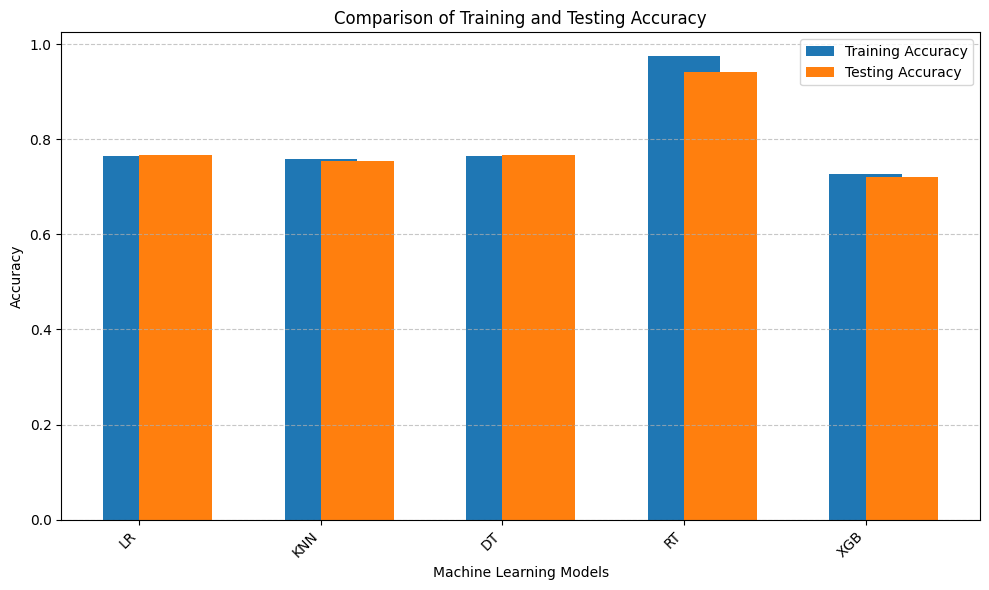

In [7]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracy values (training and testing)
models = ['LR', 'KNN', 'DT', 'RT', 'XGB']
train_acc = [0.7645515556370667, 0.7575326156897243, 0.7653006984746705, 0.9758067273648512, 0.7263856811138293]
test_acc = [0.76602380451575, 0.7543391381923944, 0.7661035880846866, 0.9418667904520827, 0.7199451669289854]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, train_acc, label='Training Accuracy', width=0.4, align='center')
plt.bar(models, test_acc, label='Testing Accuracy', width=0.4, align='edge')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Display the plot
plt.tight_layout()
plt.show()

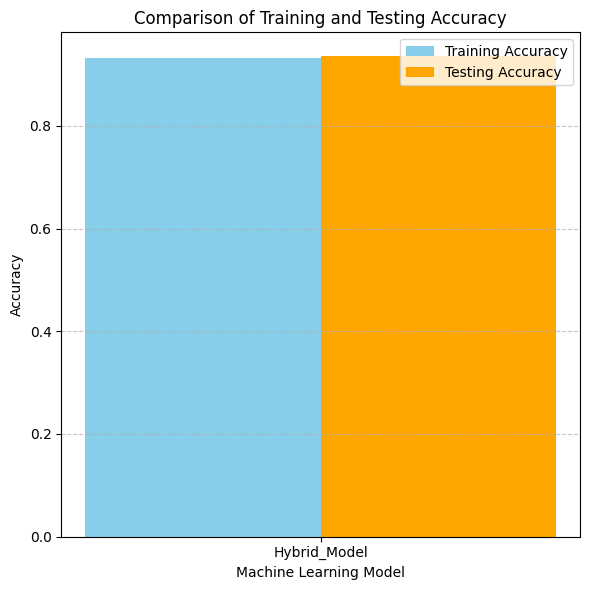

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and corresponding accuracy values (training and testing)
model_name = 'Hybrid_Model'
train_acc = 0.9319678832207546
test_acc = 0.9354695988337093

# Create a single bar with two segments
x = np.arange(1)  # x-axis value for the bar
width = 0.35  # width of the bar

fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figure size as needed
rects1 = ax.bar(x - width/2, [train_acc], width, label='Training Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, [test_acc], width, label='Testing Accuracy', color='orange')

ax.set_xlabel('Machine Learning Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels([model_name])
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Display the plot
plt.tight_layout()
plt.show()

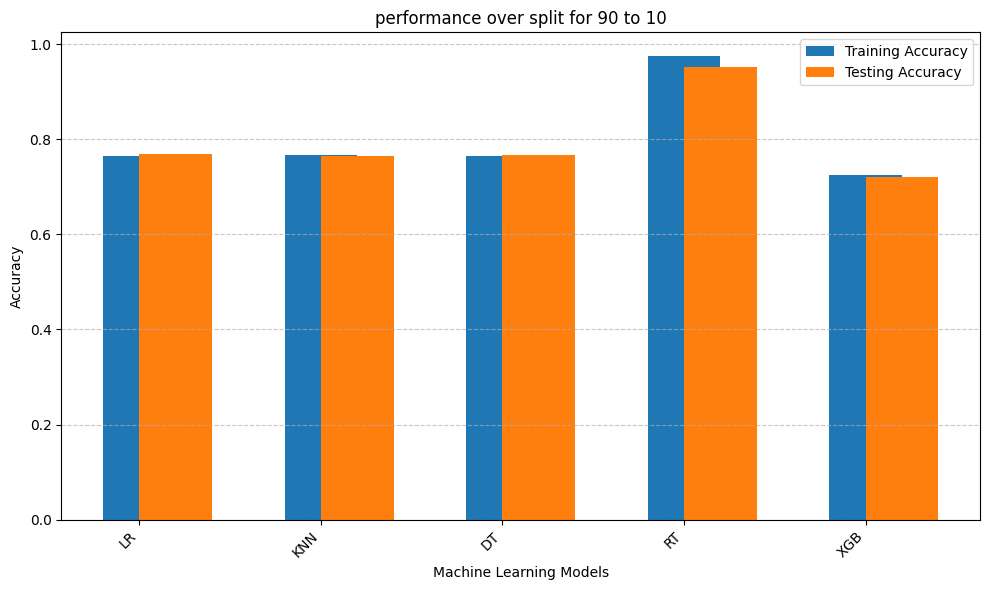

In [10]:
models = ['LR', 'KNN', 'DT', 'RT', 'XGB']
train_acc = [0.7655965920080461, 0.7659882596417934, 0.7639743143398708, 0.9758254032726007, 0.7250444857065491]
test_acc = [0.7680490882980112, 0.76474172070151, 0.765764393576744, 0.9520214108533879, 0.7203533661168894]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, train_acc, label='Training Accuracy', width=0.4, align='center')
plt.bar(models, test_acc, label='Testing Accuracy', width=0.4, align='edge')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('performance over split for 90 to 10')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Display the plot
plt.tight_layout()
plt.show()

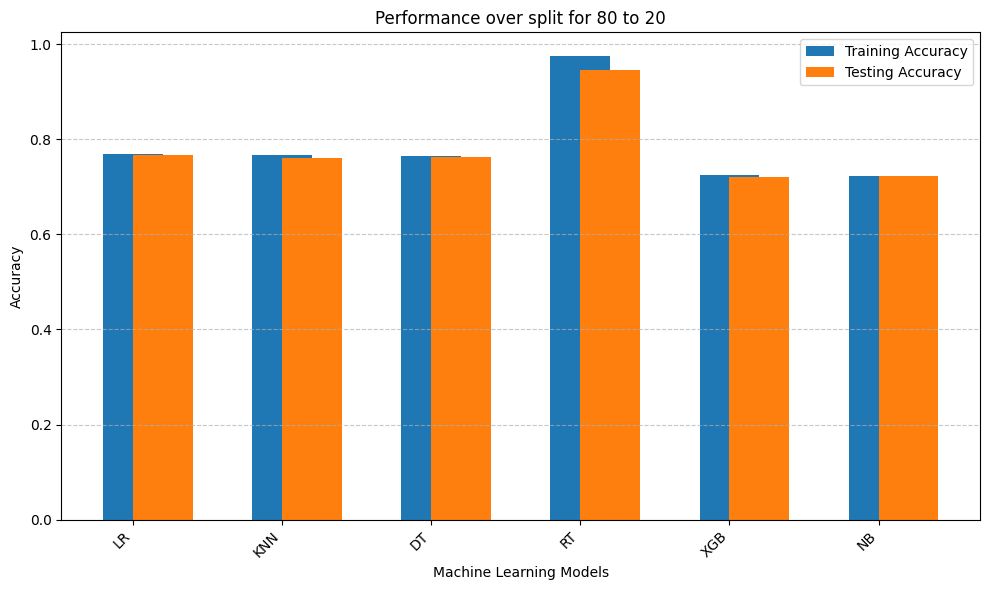

In [21]:
import matplotlib.pyplot as plt

models = ['LR', 'KNN', 'DT', 'RT', 'XGB', 'NB']
train_acc = [0.7683179250337949, 0.7658700045422525, 0.7644338911872143, 0.9760647774160295, 0.7255609137815203, 0.7228736410641382]
test_acc = [0.7666648533971604, 0.760833378665071, 0.7634988848392537, 0.9462111733666975, 0.7199477778382201, 0.7235815699287385]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, train_acc, label='Training Accuracy', width=0.4, align='center')
plt.bar(models, test_acc, label='Testing Accuracy', width=0.4, align='edge')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Performance over split for 80 to 20')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Display the plot
plt.tight_layout()
plt.show()

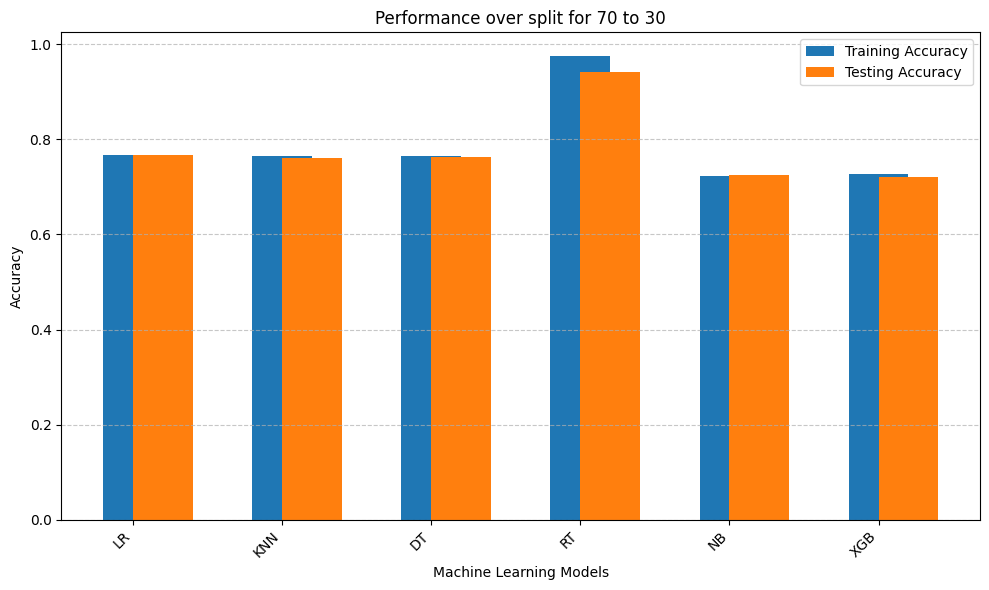

In [12]:
import matplotlib.pyplot as plt

models = ['LR', 'KNN', 'DT', 'RT', 'NB', 'XGB']
train_acc = [0.7667710078613371, 0.7642375995101041, 0.7640883926378842, 0.9762419140754924, 0.7225342787246543, 0.7274487800783958]
test_acc = [0.7663284326880535, 0.7607218237073249, 0.7628614739651709, 0.9413445707281338, 0.7241664430309053, 0.7202643012047318]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, train_acc, label='Training Accuracy', width=0.4, align='center')
plt.bar(models, test_acc, label='Testing Accuracy', width=0.4, align='edge')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Performance over split for 70 to 30')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Display the plot
plt.tight_layout()
plt.show()

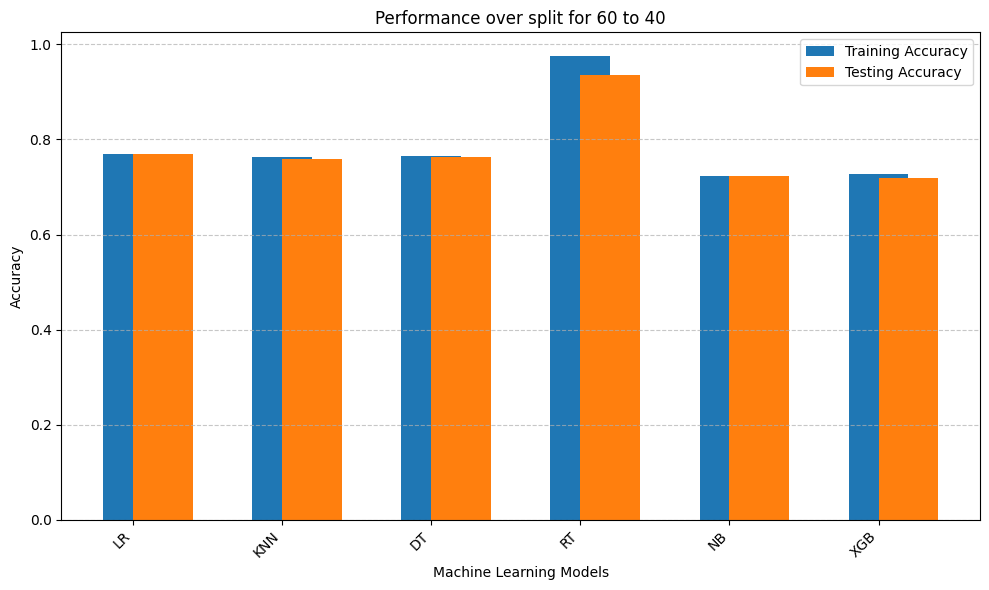

In [13]:
import matplotlib.pyplot as plt

models = ['LR', 'KNN', 'DT', 'RT', 'NB', 'XGB']
train_acc = [0.7689958802367414, 0.7624608332366253, 0.764201578275502, 0.9765615933619589, 0.7222242369734246, 0.7265688464662876]
test_acc = [0.7692759614861557, 0.759680139259098, 0.7630800195833106, 0.9356688244573791, 0.7241037915465376, 0.7192623619648588]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, train_acc, label='Training Accuracy', width=0.4, align='center')
plt.bar(models, test_acc, label='Testing Accuracy', width=0.4, align='edge')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Performance over split for 60 to 40')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Display the plot
plt.tight_layout()
plt.show()

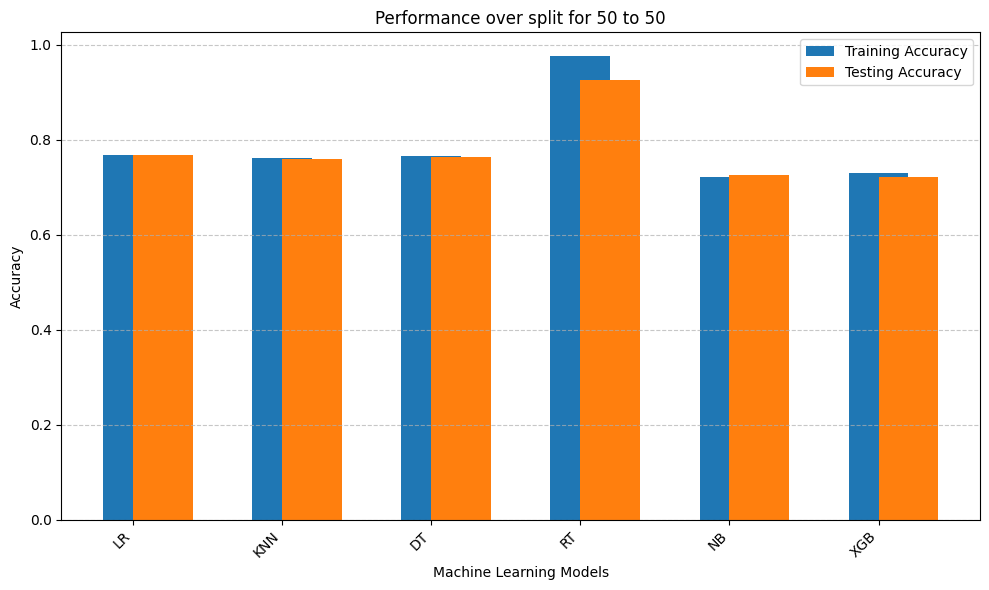

In [14]:
import matplotlib.pyplot as plt

models = ['LR', 'KNN', 'DT', 'RT', 'NB', 'XGB']
train_acc = [0.7675804114244931, 0.7610047565789188, 0.765300038731521, 0.9768176615735442, 0.7220861058284411, 0.7300891695352653]
test_acc = [0.7678763376518254, 0.7582369759821052, 0.7628847584937355, 0.9261707581368833, 0.7246319417547555, 0.7203149003207318]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, train_acc, label='Training Accuracy', width=0.4, align='center')
plt.bar(models, test_acc, label='Testing Accuracy', width=0.4, align='edge')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Performance over split for 50 to 50')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Display the plot
plt.tight_layout()
plt.show()

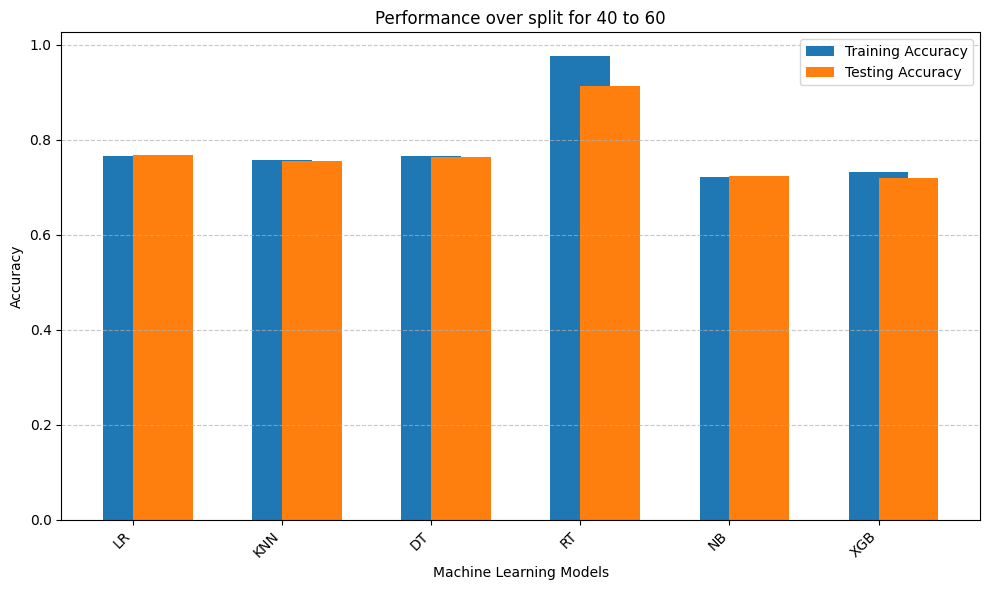

In [15]:
import matplotlib.pyplot as plt

models = ['LR', 'KNN', 'DT', 'RT', 'NB', 'XGB']
train_acc = [0.7659999238422665, 0.7582916732398044, 0.7651295497445996, 0.9771581197743555, 0.7214966082609382, 0.7319846161378237]
test_acc = [0.7679413951295581, 0.7557997425157301, 0.7631652432501043, 0.9130573537144826, 0.7239623565250504, 0.7202415274982321]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, train_acc, label='Training Accuracy', width=0.4, align='center')
plt.bar(models, test_acc, label='Testing Accuracy', width=0.4, align='edge')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Performance over split for 40 to 60')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Display the plot
plt.tight_layout()
plt.show()

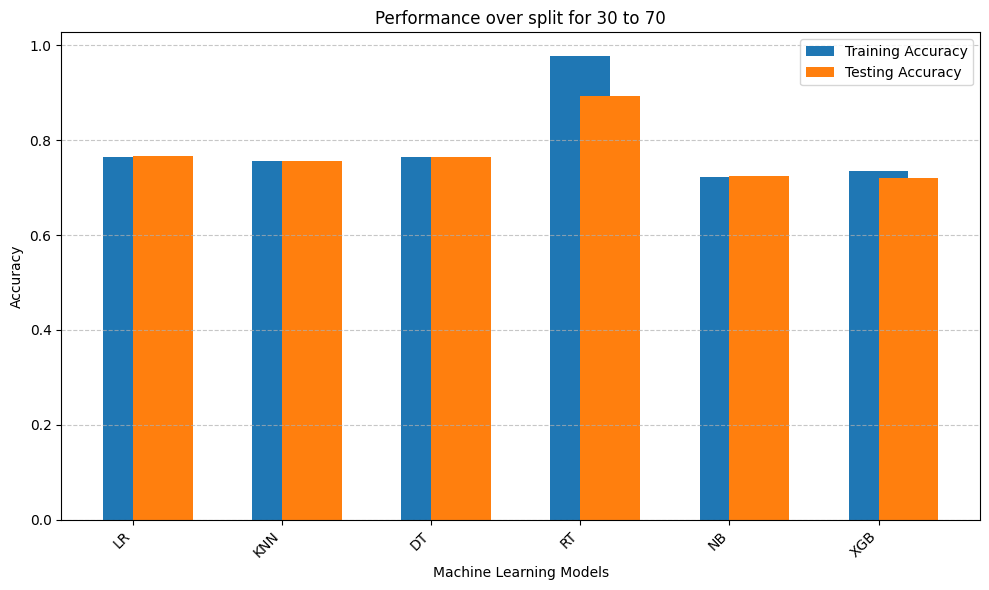

In [16]:
import matplotlib.pyplot as plt

models = ['LR', 'KNN', 'DT', 'RT', 'NB', 'XGB']
train_acc = [0.7650937101079262, 0.7563609724962284, 0.763614076824881, 0.9782696994313567, 0.7216983869095973, 0.7351891609608913]
test_acc = [0.7662277511485786, 0.7553512256684758, 0.7635575781313141, 0.893193079309423, 0.7235049828723477, 0.7196411585877613]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, train_acc, label='Training Accuracy', width=0.4, align='center')
plt.bar(models, test_acc, label='Testing Accuracy', width=0.4, align='edge')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Performance over split for 30 to 70')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Display the plot
plt.tight_layout()
plt.show()

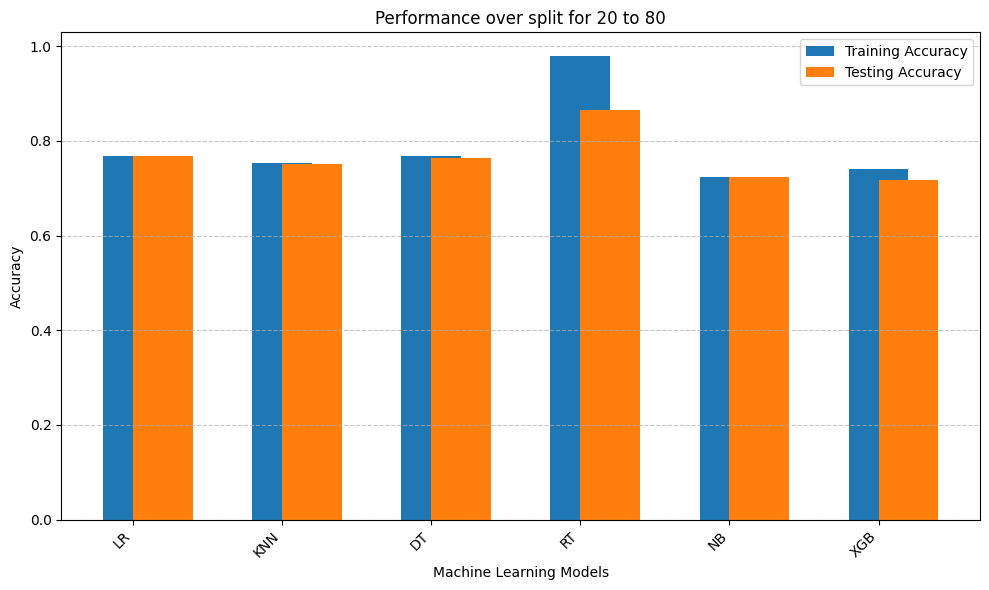

In [17]:
import matplotlib.pyplot as plt

models = ['LR', 'KNN', 'DT', 'RT', 'NB', 'XGB']
train_acc = [0.7680114019627042, 0.7540309419674913, 0.7683160345540396, 0.9799486476488892, 0.7225776269121135, 0.7396479317622996]
test_acc = [0.7676875373986836, 0.7500353587553719, 0.7639068704781592, 0.8644617309470707, 0.7224963281292498, 0.7164255018223359]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, train_acc, label='Training Accuracy', width=0.4, align='center')
plt.bar(models, test_acc, label='Testing Accuracy', width=0.4, align='edge')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Performance over split for 20 to 80')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Display the plot
plt.tight_layout()
plt.show()

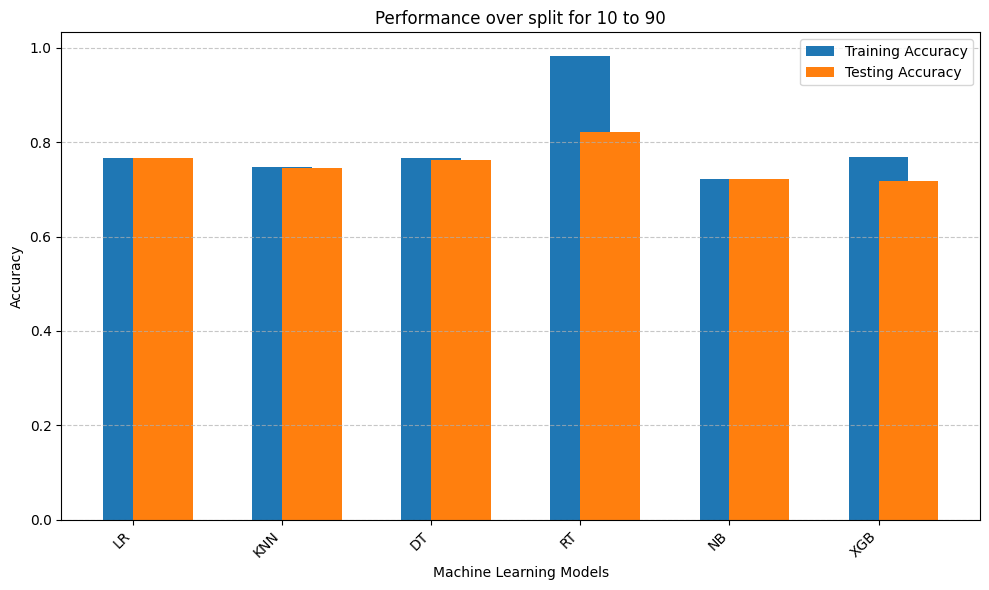

In [18]:
import matplotlib.pyplot as plt

models = ['LR', 'KNN', 'DT', 'RT', 'NB', 'XGB']
train_acc = [0.7658680940879518, 0.747133189720826, 0.7675653328111061, 0.9837891942467959, 0.7230889744761407, 0.7682616358770155]
test_acc = [0.767253280208502, 0.745856674169582, 0.7615426832069282, 0.8215861533737733, 0.7228111997330864, 0.7188993682561403]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, train_acc, label='Training Accuracy', width=0.4, align='center')
plt.bar(models, test_acc, label='Testing Accuracy', width=0.4, align='edge')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Performance over split for 10 to 90')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Display the plot
plt.tight_layout()
plt.show()